# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
## 超參數設定
"""
Set your required experiment parameters
"""
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
OPTIMIZER = ['SGD', 'Adam', 'Rmsprop']

In [16]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    for optimizer in OPTIMIZER:
        print("Experiment with LR = %.6f OPTIMIZER = %s" % (lr,str(optimizer)))
        keras.backend.clear_session() # 把舊的 Graph 清掉
        
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-lr-%s-opt-%s" % (str(lr),str(optimizer))
        print(exp_name_tag)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with LR = 0.100000 OPTIMIZER = SGD
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions f

50000/50000 [==============================] - 10s 191us/step - loss: 1.4386 - acc: 0.4970 - val_loss: 1.6321 - val_acc: 0.4195
Epoch 48/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.4493 - acc: 0.4934 - val_loss: 1.6715 - val_acc: 0.4167
Epoch 49/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.4344 - acc: 0.4991 - val_loss: 1.6802 - val_acc: 0.4341
Epoch 50/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.4265 - acc: 0.5017 - val_loss: 1.6753 - val_acc: 0.4152
exp-lr-0.1-opt-<keras.optimizers.SGD object at 0x000001AABD3D83C8>
Experiment with LR = 0.100000 OPTIMIZER = Adam
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
__________

50000/50000 [==============================] - 10s 192us/step - loss: 1.4566 - acc: 0.4879 - val_loss: 1.7154 - val_acc: 0.4263
Epoch 48/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.4631 - acc: 0.4868 - val_loss: 1.6440 - val_acc: 0.4210
Epoch 49/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.4444 - acc: 0.4929 - val_loss: 1.6288 - val_acc: 0.4447
Epoch 50/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.4511 - acc: 0.4933 - val_loss: 1.7664 - val_acc: 0.3957
exp-lr-0.1-opt-<keras.optimizers.SGD object at 0x000001AABD73B358>
Experiment with LR = 0.100000 OPTIMIZER = Rmsprop
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_____

50000/50000 [==============================] - 10s 192us/step - loss: 2.3046 - acc: 0.0995 - val_loss: 2.3038 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.3042 - acc: 0.0989 - val_loss: 2.3047 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 10s 204us/step - loss: 2.3040 - acc: 0.0979 - val_loss: 2.3053 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 9s 187us/step - loss: 2.3040 - acc: 0.1011 - val_loss: 2.3035 - val_acc: 0.1000
exp-lr-0.1-opt-<keras.optimizers.SGD object at 0x000001AABDABB940>
Experiment with LR = 0.010000 OPTIMIZER = SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________

50000/50000 [==============================] - 10s 190us/step - loss: 0.4072 - acc: 0.8534 - val_loss: 2.1724 - val_acc: 0.5274
Epoch 48/50
50000/50000 [==============================] - 9s 187us/step - loss: 0.3994 - acc: 0.8572 - val_loss: 2.2397 - val_acc: 0.5272
Epoch 49/50
50000/50000 [==============================] - 9s 185us/step - loss: 0.3885 - acc: 0.8601 - val_loss: 2.2167 - val_acc: 0.5251
Epoch 50/50
50000/50000 [==============================] - 9s 185us/step - loss: 0.3782 - acc: 0.8631 - val_loss: 2.2443 - val_acc: 0.5247
exp-lr-0.01-opt-<keras.optimizers.SGD object at 0x000001AABD3F7240>
Experiment with LR = 0.010000 OPTIMIZER = Adam
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
__________

50000/50000 [==============================] - 9s 186us/step - loss: 0.4137 - acc: 0.8513 - val_loss: 2.0911 - val_acc: 0.5231
Epoch 48/50
50000/50000 [==============================] - 10s 199us/step - loss: 0.4075 - acc: 0.8526 - val_loss: 2.1802 - val_acc: 0.5254
Epoch 49/50
50000/50000 [==============================] - 9s 189us/step - loss: 0.3863 - acc: 0.8620 - val_loss: 2.1834 - val_acc: 0.5359
Epoch 50/50
50000/50000 [==============================] - 10s 195us/step - loss: 0.3743 - acc: 0.8649 - val_loss: 2.2702 - val_acc: 0.5261
exp-lr-0.01-opt-<keras.optimizers.SGD object at 0x000001AABD8CA898>
Experiment with LR = 0.010000 OPTIMIZER = Rmsprop
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
______

50000/50000 [==============================] - 9s 189us/step - loss: 0.4140 - acc: 0.8503 - val_loss: 2.1630 - val_acc: 0.5279
Epoch 48/50
50000/50000 [==============================] - 9s 189us/step - loss: 0.3909 - acc: 0.8583 - val_loss: 2.2258 - val_acc: 0.5240
Epoch 49/50
50000/50000 [==============================] - 9s 189us/step - loss: 0.3819 - acc: 0.8618 - val_loss: 2.2397 - val_acc: 0.5250
Epoch 50/50
50000/50000 [==============================] - 9s 188us/step - loss: 0.3741 - acc: 0.8672 - val_loss: 2.2641 - val_acc: 0.5234
exp-lr-0.01-opt-<keras.optimizers.SGD object at 0x000001AABDF86FD0>
Experiment with LR = 0.001000 OPTIMIZER = SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
____________

50000/50000 [==============================] - 10s 206us/step - loss: 0.9117 - acc: 0.6827 - val_loss: 1.4242 - val_acc: 0.5211
Epoch 48/50
50000/50000 [==============================] - 9s 185us/step - loss: 0.9005 - acc: 0.6849 - val_loss: 1.3591 - val_acc: 0.5409
Epoch 49/50
50000/50000 [==============================] - 9s 184us/step - loss: 0.8814 - acc: 0.6909 - val_loss: 1.3610 - val_acc: 0.5339
Epoch 50/50
50000/50000 [==============================] - 9s 185us/step - loss: 0.8734 - acc: 0.6941 - val_loss: 1.4593 - val_acc: 0.5174
exp-lr-0.001-opt-<keras.optimizers.SGD object at 0x000001AABD4625F8>
Experiment with LR = 0.001000 OPTIMIZER = Adam
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________

50000/50000 [==============================] - 9s 185us/step - loss: 0.9121 - acc: 0.6795 - val_loss: 1.3592 - val_acc: 0.5322
Epoch 48/50
50000/50000 [==============================] - 9s 184us/step - loss: 0.9017 - acc: 0.6806 - val_loss: 1.5414 - val_acc: 0.4979
Epoch 49/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.8889 - acc: 0.6878 - val_loss: 1.5020 - val_acc: 0.5011
Epoch 50/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.8769 - acc: 0.6923 - val_loss: 1.4674 - val_acc: 0.5131
exp-lr-0.001-opt-<keras.optimizers.SGD object at 0x000001AABD8AC860>
Experiment with LR = 0.001000 OPTIMIZER = Rmsprop
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_____

50000/50000 [==============================] - 10s 203us/step - loss: 0.9308 - acc: 0.6718 - val_loss: 1.4781 - val_acc: 0.5063
Epoch 48/50
50000/50000 [==============================] - 9s 184us/step - loss: 0.9204 - acc: 0.6755 - val_loss: 1.4264 - val_acc: 0.5132
Epoch 49/50
50000/50000 [==============================] - 9s 185us/step - loss: 0.9072 - acc: 0.6794 - val_loss: 1.3532 - val_acc: 0.5384
Epoch 50/50
50000/50000 [==============================] - 10s 194us/step - loss: 0.8968 - acc: 0.6832 - val_loss: 1.3850 - val_acc: 0.5286
exp-lr-0.001-opt-<keras.optimizers.SGD object at 0x000001AABD72BFD0>
Experiment with LR = 0.000100 OPTIMIZER = SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________

50000/50000 [==============================] - 9s 183us/step - loss: 1.5882 - acc: 0.4461 - val_loss: 1.6016 - val_acc: 0.4384
Epoch 48/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.5832 - acc: 0.4488 - val_loss: 1.5988 - val_acc: 0.4397
Epoch 49/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.5795 - acc: 0.4495 - val_loss: 1.5965 - val_acc: 0.4375
Epoch 50/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.5746 - acc: 0.4516 - val_loss: 1.5902 - val_acc: 0.4404
exp-lr-0.0001-opt-<keras.optimizers.SGD object at 0x000001AABDC2F780>
Experiment with LR = 0.000100 OPTIMIZER = Adam
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_______

50000/50000 [==============================] - 11s 221us/step - loss: 1.5740 - acc: 0.4494 - val_loss: 1.5924 - val_acc: 0.4381
Epoch 48/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.5697 - acc: 0.4517 - val_loss: 1.5878 - val_acc: 0.4395
Epoch 49/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.5656 - acc: 0.4537 - val_loss: 1.5814 - val_acc: 0.4420
Epoch 50/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.5613 - acc: 0.4549 - val_loss: 1.5778 - val_acc: 0.4411
exp-lr-0.0001-opt-<keras.optimizers.SGD object at 0x000001AABD5A9898>
Experiment with LR = 0.000100 OPTIMIZER = Rmsprop
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
__

50000/50000 [==============================] - 11s 221us/step - loss: 1.5806 - acc: 0.4491 - val_loss: 1.5907 - val_acc: 0.4444
Epoch 48/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.5766 - acc: 0.4507 - val_loss: 1.5871 - val_acc: 0.4466
Epoch 49/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.5721 - acc: 0.4518 - val_loss: 1.5830 - val_acc: 0.4468
Epoch 50/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.5686 - acc: 0.4544 - val_loss: 1.5807 - val_acc: 0.4473
exp-lr-0.0001-opt-<keras.optimizers.SGD object at 0x000001AABDEF6FD0>
Experiment with LR = 0.000010 OPTIMIZER = SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
______

50000/50000 [==============================] - 11s 222us/step - loss: 1.9360 - acc: 0.3281 - val_loss: 1.9317 - val_acc: 0.3324
Epoch 48/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.9324 - acc: 0.3299 - val_loss: 1.9282 - val_acc: 0.3328
Epoch 49/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.9288 - acc: 0.3311 - val_loss: 1.9248 - val_acc: 0.3340
Epoch 50/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.9254 - acc: 0.3308 - val_loss: 1.9213 - val_acc: 0.3359
exp-lr-1e-05-opt-<keras.optimizers.SGD object at 0x000001AABE1EF588>
Experiment with LR = 0.000010 OPTIMIZER = Adam
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
______

50000/50000 [==============================] - 11s 222us/step - loss: 1.9266 - acc: 0.3295 - val_loss: 1.9270 - val_acc: 0.3322
Epoch 48/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.9231 - acc: 0.3312 - val_loss: 1.9236 - val_acc: 0.3344
Epoch 49/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.9197 - acc: 0.3325 - val_loss: 1.9202 - val_acc: 0.3338
Epoch 50/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.9163 - acc: 0.3333 - val_loss: 1.9170 - val_acc: 0.3355
exp-lr-1e-05-opt-<keras.optimizers.SGD object at 0x000001AABD62F6A0>
Experiment with LR = 0.000010 OPTIMIZER = Rmsprop
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___

50000/50000 [==============================] - 11s 229us/step - loss: 1.9270 - acc: 0.3326 - val_loss: 1.9280 - val_acc: 0.3299
Epoch 48/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.9236 - acc: 0.3336 - val_loss: 1.9246 - val_acc: 0.3323
Epoch 49/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.9203 - acc: 0.3355 - val_loss: 1.9215 - val_acc: 0.3336
Epoch 50/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.9171 - acc: 0.3363 - val_loss: 1.9183 - val_acc: 0.3346
exp-lr-1e-05-opt-<keras.optimizers.SGD object at 0x000001AABDF11898>


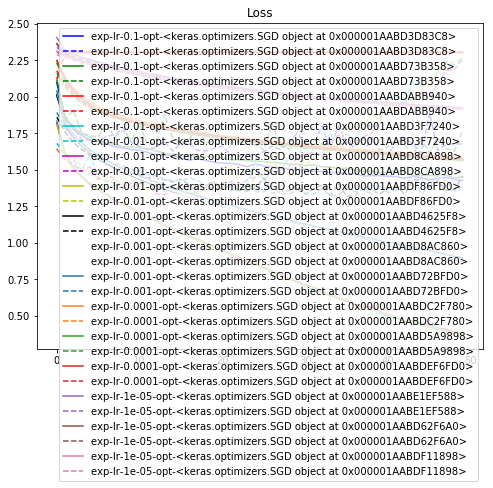

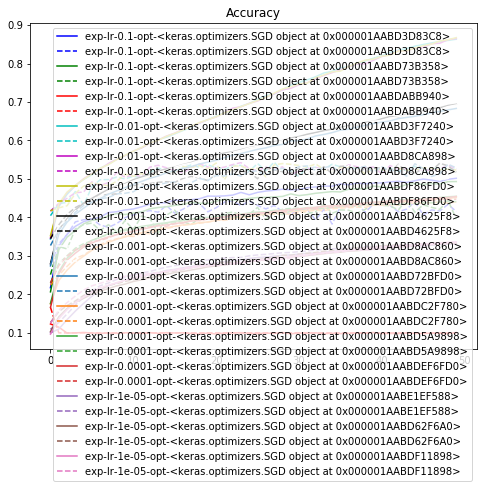

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

No handles with labels found to put in legend.


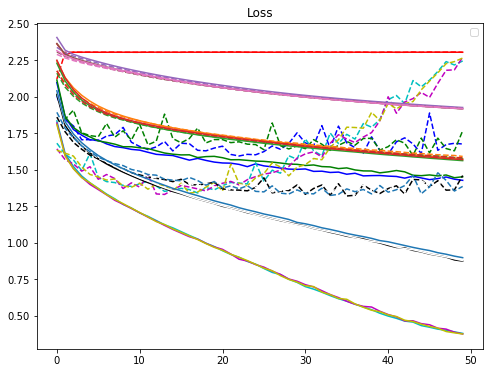

No handles with labels found to put in legend.


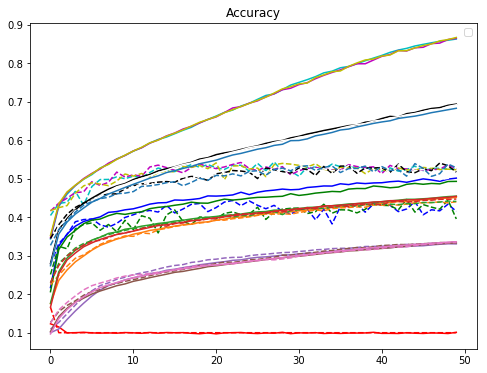

In [18]:
color_bar = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-' ,color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()